In [48]:
# Learning from the example provided at
# https://kernc.github.io/backtesting.py/

from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG

import warnings

warnings.filterwarnings("ignore")

GOOG.head()

,Open,High,Low,Close,Volume
2004-08-19,100.00,104.06,95.96,100.34,22351900
2004-08-20,101.01,109.08,100.50,108.31,11428600
2004-08-23,110.75,113.48,109.05,109.40,9137200
2004-08-24,111.24,111.60,103.57,104.87,7631300
2004-08-25,104.96,108.00,103.88,106.00,4598900


<Axes: >

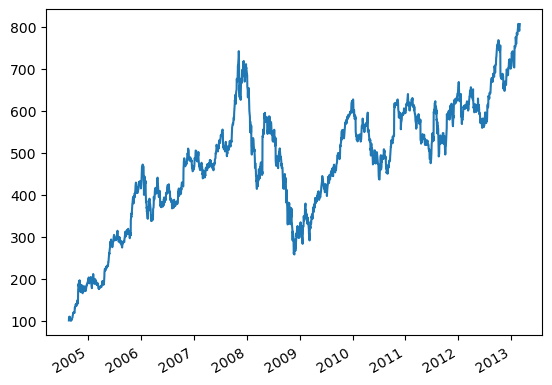

In [49]:
GOOG["Close"].plot()

In [50]:
class SmaCross(Strategy):
    n1 = 10
    n2 = 20

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()


bt = Backtest(
    GOOG,
    SmaCross,
    cash=10000,
    commission=0.002,
    exclusive_orders=True,
)

output = bt.run()

In [51]:
bt.plot()

GridPlot(id='p2760', ...)

In [52]:
output

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   97.067039
Equity Final [$]                  68221.96986
Equity Peak [$]                   68991.21986
Return [%]                         582.219699
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   25.266427
Volatility (Ann.) [%]               38.383008
Sharpe Ratio                         0.658271
Sortino Ratio                        1.288779
Calmar Ratio                         0.763748
Max. Drawdown [%]                  -33.082172
Avg. Drawdown [%]                   -5.581506
Max. Drawdown Duration      688 days 00:00:00
Avg. Drawdown Duration       41 days 00:00:00
# Trades                                   94
Win Rate [%]                        54.255319
Best Trade [%]                       57.11931
Worst Trade [%]                    -16.629898
Avg. Trade [%]                    

In [76]:
stats, heatmap = bt.optimize(
    n1=range(5, 30, 5),
    n2=range(10, 70, 5),
    maximize="Equity Final [$]",
    constraint=lambda param: param.n1 < param.n2,
    random_state=0,
    return_heatmap=True,
)

stats

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.068901
Equity Final [$]                 103949.42612
Equity Peak [$]                  108327.71798
Return [%]                         939.494261
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   31.610936
Volatility (Ann.) [%]               44.739816
Sharpe Ratio                          0.70655
Sortino Ratio                        1.490961
Calmar Ratio                         0.718505
Max. Drawdown [%]                  -43.995445
Avg. Drawdown [%]                   -6.138853
Max. Drawdown Duration      690 days 00:00:00
Avg. Drawdown Duration       43 days 00:00:00
# Trades                                  153
Win Rate [%]                        51.633987
Best Trade [%]                      61.562908
Worst Trade [%]                    -19.778312
Avg. Trade [%]                    

In [77]:
stats["_strategy"]

<Strategy SmaCross(n1=10,n2=15)>

In [73]:
bt.plot(plot_volume=False, plot_pl=False)

GridPlot(id='p3528', ...)

In [78]:
hm = heatmap.apply(lambda x: x / 1000).unstack()

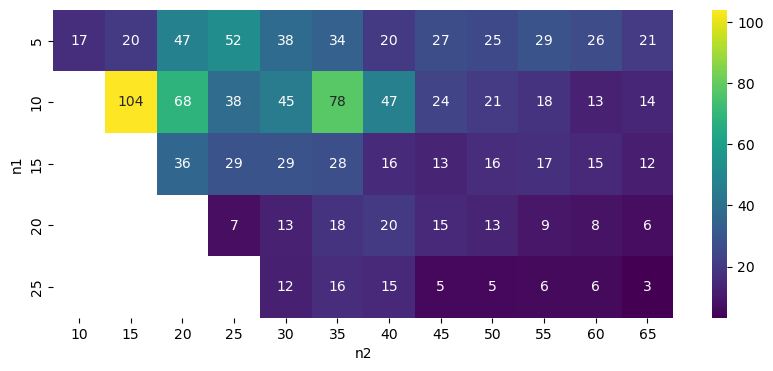

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.heatmap(hm, annot=True, cmap="viridis", fmt=".0f")
plt.show()